In [1]:
import torch
import torchvision
import torchvision.transforms as transforms

In [2]:
# Define the transforms that you want to perform, orderwise
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((.5,.5,.5), (.5,.5,.5))])
# Get the dataset and apply transforms
trainset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)
# Load the dataset, and divide into mini-batches
trainloader = torch.utils.data.DataLoader(trainset, batch_size=4, shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=4, shuffle=False, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

Files already downloaded and verified
Files already downloaded and verified


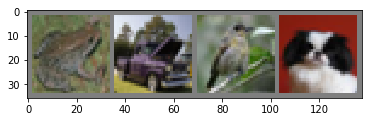

     frog       car      bird       dog


In [3]:
import matplotlib.pyplot as plt
import numpy as np

def imshow(img):
    img = img/2 + 0.5
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1,2,0)))
    plt.show()

# get some random 
dataiter = iter(trainloader)
images, labels = dataiter.next()

imshow(torchvision.utils.make_grid(images))
print(' '.join('%9s' % classes[labels[j]] for j in range(4)))

In [4]:
from torch.autograd import Variable
import torch.nn as nn
import torch.nn.functional as F

class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(3,6,5)
        self.pool = nn.MaxPool2d(2,2)
        self.conv2 = nn.Conv2d(6,16,5)
        self.fc1 = nn.Linear(16*5*5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)
        
    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 16*5*5)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

In [5]:
net = Net()
net.cuda()

Net (
  (conv1): Conv2d(3, 6, kernel_size=(5, 5), stride=(1, 1))
  (pool): MaxPool2d (size=(2, 2), stride=(2, 2), dilation=(1, 1))
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear (400 -> 120)
  (fc2): Linear (120 -> 84)
  (fc3): Linear (84 -> 10)
)

In [6]:
import torch.optim as optim

In [7]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

In [8]:
for epoch in range(10):
    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        inputs, labels = data
        
        # wrap them in a Variable, because input should be variable
        inputs, labels = Variable(inputs.cuda()), Variable(labels.cuda())
        optimizer.zero_grad()
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        
        running_loss += loss.data[0]
        if i%2000 == 1999:
            print('[%d, %5d] loss: %3f' % (epoch+1, i+1, running_loss/2000))
            running_loss = 0.0
print('Finished training.')

[1,  2000] loss: 2.199878
[1,  4000] loss: 1.851723
[1,  6000] loss: 1.682083
[1,  8000] loss: 1.560198
[1, 10000] loss: 1.514026
[1, 12000] loss: 1.453494
[2,  2000] loss: 1.390913
[2,  4000] loss: 1.375608
[2,  6000] loss: 1.372205
[2,  8000] loss: 1.323982
[2, 10000] loss: 1.318037
[2, 12000] loss: 1.306079
[3,  2000] loss: 1.240669
[3,  4000] loss: 1.213242
[3,  6000] loss: 1.214875
[3,  8000] loss: 1.207897
[3, 10000] loss: 1.204147
[3, 12000] loss: 1.215169
[4,  2000] loss: 1.108747
[4,  4000] loss: 1.142114
[4,  6000] loss: 1.130189
[4,  8000] loss: 1.122265
[4, 10000] loss: 1.126745
[4, 12000] loss: 1.120516
[5,  2000] loss: 1.017793
[5,  4000] loss: 1.062216
[5,  6000] loss: 1.056773
[5,  8000] loss: 1.067307
[5, 10000] loss: 1.076457
[5, 12000] loss: 1.065350
[6,  2000] loss: 0.958780
[6,  4000] loss: 1.005446
[6,  6000] loss: 0.992344
[6,  8000] loss: 1.034378
[6, 10000] loss: 1.020160
[6, 12000] loss: 0.997422
[7,  2000] loss: 0.921991
[7,  4000] loss: 0.946485
[7,  6000] l

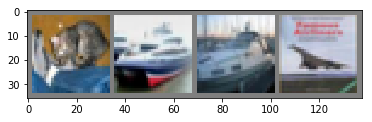

Ground truth:    cat  ship  ship plane


In [9]:
dataiter = iter(testloader)
images, labels = dataiter.next()

imshow(torchvision.utils.make_grid(images))
print('Ground truth: ', ' '.join('%5s' % classes[labels[j]] for j in range(4)))

In [10]:
outputs = net(Variable(images.cuda()))

In [11]:
_, predicted = torch.max(outputs.data, 1)
print('Predicted: ', ' '.join('%5s' % classes[predicted[j]] for j in range(4)))

Predicted:    cat  ship  ship plane


In [12]:
correct = 0
total = 0
for data in testloader:
    images, labels = data
    optputs = net(Variable(images.cuda()))
    _, predicted = torch.max(outputs.data, 1)
    total+= labels.size(0)
    correct += (predicted.cpu() == labels.cpu()).sum()
    
print('Accuracy on 10000 test images: %d %%' % (correct*100/total))

Accuracy on 10000 test images: 9 %
